<h4>Part 3: Modelling</h4>

<p>1.1 build model with continous models</p>
<p>1.2 combine with category variables</p>
<p>1.3 Ridge and Lasso models</p>

<p>1.4 Cross validation and Hyper-parameter tuning</p>
<p>1.4 Polynomial interactions?</p>

In [2]:
%load_ext autoreload
%autoreload 2

import lib, data, model
import graphs as gr
 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [42]:
df = data.cleanBBData()

X = df.drop(columns=['rent_price','listing_id','description','details_url','first_published_date'])
y = df['rent_price']

run = model.ModelTry(X,y)

In [15]:
## Perform a first naive linear regression model using only Continious Data Variables
lin_con, coef1 = run.run_model(1)

Training r^2 %: 53.39
Testing r^2 %: 57.709
Training MSE (mil): 0.39084401677332026
Testing MSE (mil): 0.38398586942758445


In [16]:
lin_reg, coef2 = run.run_model(2)

Training r^2 %: 56.712
Testing r^2 %: 61.177
Training MSE (mil): 0.3629817444647254
Testing MSE (mil): 0.35249380259585034


Training r^2 %: 56.481
Testing r^2 %: 61.333
Training MSE (mil): 0.364925449516853
Testing MSE (mil): 0.3510778773302271


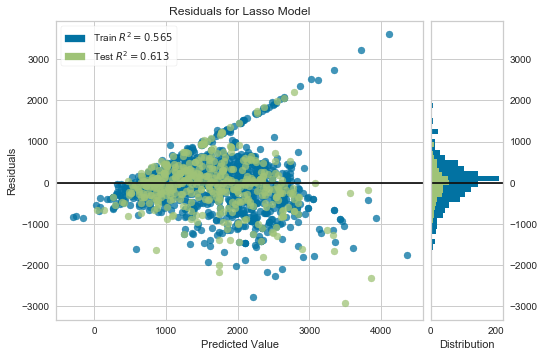

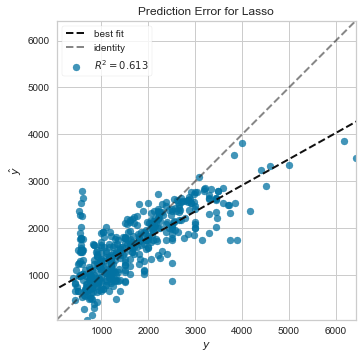

In [36]:
las, coef3 = run.run_model(3,True)

In [38]:
coef3.sort_values('coef_abs', ascending=False).head()

,coef_value,coef_abs
num_bedrooms,3530.542236,3530.542236
shared_occu,-415.419220,415.419220
latitude,-413.119185,413.119185
num_recepts,-402.162661,402.162661
student,391.446854,391.446854


In [35]:
ridge, coef4 = run.run_model(4)

Training r^2 %: 56.559
Testing r^2 %: 60.931
Training MSE (mil): 0.36426399526615577
Testing MSE (mil): 0.3547254920605877


<h3>Model Assumption Checking</h3>

1. check residuals are normally distributed

2. scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line)

3. Multicollinearity of Features

In [40]:
# No major multicolinearity issue apart from long and lat, because we only plots two cities

# X_train_all.corr()*100
# abs(df.corr()) > 0.70
pd.DataFrame(np.tril(X.corr().values*100))

,0,1,2,3,4,5,6,7,8,9
0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-14.126580,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-4.321721,-15.238848,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,5.295561,17.375921,-88.256768,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,10.841025,16.119957,-10.916990,13.412180,100.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-8.231471,4.399570,6.784215,-3.929641,38.290139,100.000000,0.000000,0.000000,0.000000,0.0
6,0.827042,20.353749,-8.626246,11.690686,51.303059,17.473006,100.000000,0.000000,0.000000,0.0
7,23.398382,-8.888288,6.368803,-5.103411,-1.355793,-14.010032,-8.834512,100.000000,0.000000,0.0
8,7.172636,-25.115333,2.426963,-4.750238,-8.590180,16.107176,-12.658451,-3.494451,100.000000,0.0
9,-9.860929,16.578065,-2.049915,2.643467,23.720666,11.953887,25.964135,-5.679416,-16.559184,100.0
